# CODER HOUSE - ENTREGA 2
### Coderhouse - Data Science - Comisión 61615
Alumna Daniela González

## Objetivos
### Objetivo Principal:



*   Analizar los indices de suicidio en los países a través de los años 1990 a 2022, para determinar una predicción futura de estos.

### Objetivos Específicos:
1.	Analizar patrones históricos de suicidio en otros países y otras variables de mortalidad.
2.	Identificar las características más influyentes en la predicción de suicidios de cada país / continente.
3.	Desarrollar y validar modelos predictivos de machine learning.

# Dependencias


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["#FF5733", "#33C1FF", "#F7FF33", "#88B04B" , "#92A8D1", "#2E8B57"]




# Establecer la paleta globalmente
sns.set_palette(custom_palette)


#  DataSet


In [10]:
path = "/content/drive/MyDrive/CODER HOUSE - MODULO 2 - DANIELA GONZÁLEZ/age_std_suicide_rates_1990-2022.csv.csv"
df= pd.read_csv(path)
df.head()
#Se muestran las primeras filas de la tabla. Podemos ver que muchas de estas tienen problemas,
#por lo que hyay que limpiar la información antes de poder continuar con las gráficas


,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992.0,Male,33.0,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992.0,Female,14.0,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993.0,Male,46.0,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993.0,Female,27.0,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994.0,Male,37.0,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [11]:
df.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,5872.000000,5872.000000,5871.000000,5664.000000,5664.000000,5.578000e+03,5.512000e+03,5512.000000,5.376000e+03,5336.000000,5151.000000,5318.000000
mean,2005.761410,1275.481437,1.253407,9.633804,10.660289,2.473453e+07,4.912115e+11,17307.339730,5.005457e+11,21981.259370,20.466449,55.718969
std,8.749068,3904.992156,1.188174,10.760195,11.809824,4.550004e+07,1.661615e+12,19377.306963,1.697141e+12,18860.748967,163.957663,8.175504
min,1990.000000,0.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,30.000000,0.427858,2.509100,2.717917,2.457222e+06,1.152319e+10,3913.263188,1.159084e+10,8617.500000,1.503075,50.741500
50%,2006.000000,219.000000,0.872211,5.971800,6.721382,6.930100e+06,6.176251e+10,9521.263850,5.834463e+10,15995.000000,3.041363,55.957000
75%,2013.000000,848.000000,1.842638,13.035398,14.262386,2.581823e+07,3.030000e+11,24921.714180,3.070000e+11,29350.000000,6.554744,60.433000
max,2022.000000,51464.000000,16.666667,80.261488,83.522190,3.320316e+08,2.330000e+13,133711.794400,2.370000e+13,152630.000000,4734.914347,87.518000


#Información del Data Set

##Descripción de Variables y Dominio



* RegionCode: Código Identificador de las regiones o continentes. No se utiliza realmente en este proyecto.
*RegionName: Nombre de la región /  continente.
* CountryCode: Código del País. No se utiliza realmente en este proyecto.
*Year: Año (de 1990 a 2022).
*Sex: Sexo o género (mujer, hombre).
*SuicideCount: Conteo de Suicidios.
*StdDeathRate: Tasa de muertes.
* DeathRatePer100K: Tasa de Suicidios por cada 100 Muertes.
* Population: Población.
*GDP: Producto Interno Burto.
*GDPPerCapita: Producto Interno Bruto Per Capita. Es lo mismo que el GDP, pero esta siendo dividido por la población.  
*GNI: Renta Nacional Bruta.  Es la suma de las retribuciones de todos los factores de producción nacionales.
*GNIPerCapita: Renta Nacional Bruta Per Capita. Es lo mismo que el GNI, pero esta siendo dividido por la población del país.  
*InflationRate: Tasa de Inflación.
*EmployementPopulation: Ratio de empleabilidad por población del país.  



# Limpieza


In [ ]:
print(df.isnull().sum())
#Se muestran los campos nulos en cada columna

RegionCode                        0
RegionName                       56
CountryCode                      56
CountryName                      56
Year                             56
Sex                              56
SuicideCount                     56
CauseSpecificDeathPercentage     57
StdDeathRate                    264
DeathRatePer100K                264
Population                      350
GDP                             416
GDPPerCapita                    416
GNI                             552
GNIPerCapita                    592
InflationRate                   777
EmploymentPopulationRatio       610
dtype: int64


In [ ]:
# df = DataFrame
df_limpio = df.dropna()


In [ ]:
df_limpio = df.dropna(how='all')
#Eliminar filas donde sea nulo


In [ ]:
# Verificar si queda algún valor nulo en el DataFrame limpio
print(df_limpio.isna().any().any())


True


In [20]:
# Verificar valores nulos
print(df.isnull().sum())

# Rellenar o eliminar nulos si es necesario
df = df.dropna()  # Eliminar filas con valores nulos, o usa df.fillna() si quieres rellenar

# Verificar el formato de las columnas
print(df.dtypes)


RegionCode                        0
RegionName                       56
CountryCode                      56
CountryName                      56
Year                             56
Sex                              56
SuicideCount                     56
CauseSpecificDeathPercentage     57
StdDeathRate                    264
DeathRatePer100K                264
Population                      350
GDP                             416
GDPPerCapita                    416
GNI                             552
GNIPerCapita                    592
InflationRate                   777
EmploymentPopulationRatio       610
dtype: int64
RegionCode                       object
RegionName                       object
CountryCode                      object
CountryName                      object
Year                            float64
Sex                              object
SuicideCount                    float64
CauseSpecificDeathPercentage    float64
StdDeathRate                    float64
DeathRatePer100

In [ ]:
# Eliminar filas con valores nulos (si es necesario)
df.dropna(inplace=True)

# Verificar tipos de datos
df.info()

# Convertir a tipo de datos adecuado si es necesario
df['Year'] = df['Year'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Index: 4644 entries, 0 to 5371
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    4644 non-null   object 
 1   RegionName                    4644 non-null   object 
 2   CountryCode                   4644 non-null   object 
 3   CountryName                   4644 non-null   object 
 4   Year                          4644 non-null   float64
 5   Sex                           4644 non-null   object 
 6   SuicideCount                  4644 non-null   float64
 7   CauseSpecificDeathPercentage  4644 non-null   float64
 8   StdDeathRate                  4644 non-null   float64
 9   DeathRatePer100K              4644 non-null   float64
 10  Population                    4644 non-null   float64
 11  GDP                           4644 non-null   float64
 12  GDPPerCapita                  4644 non-null   float64
 13  GNI     

# Gráficos


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

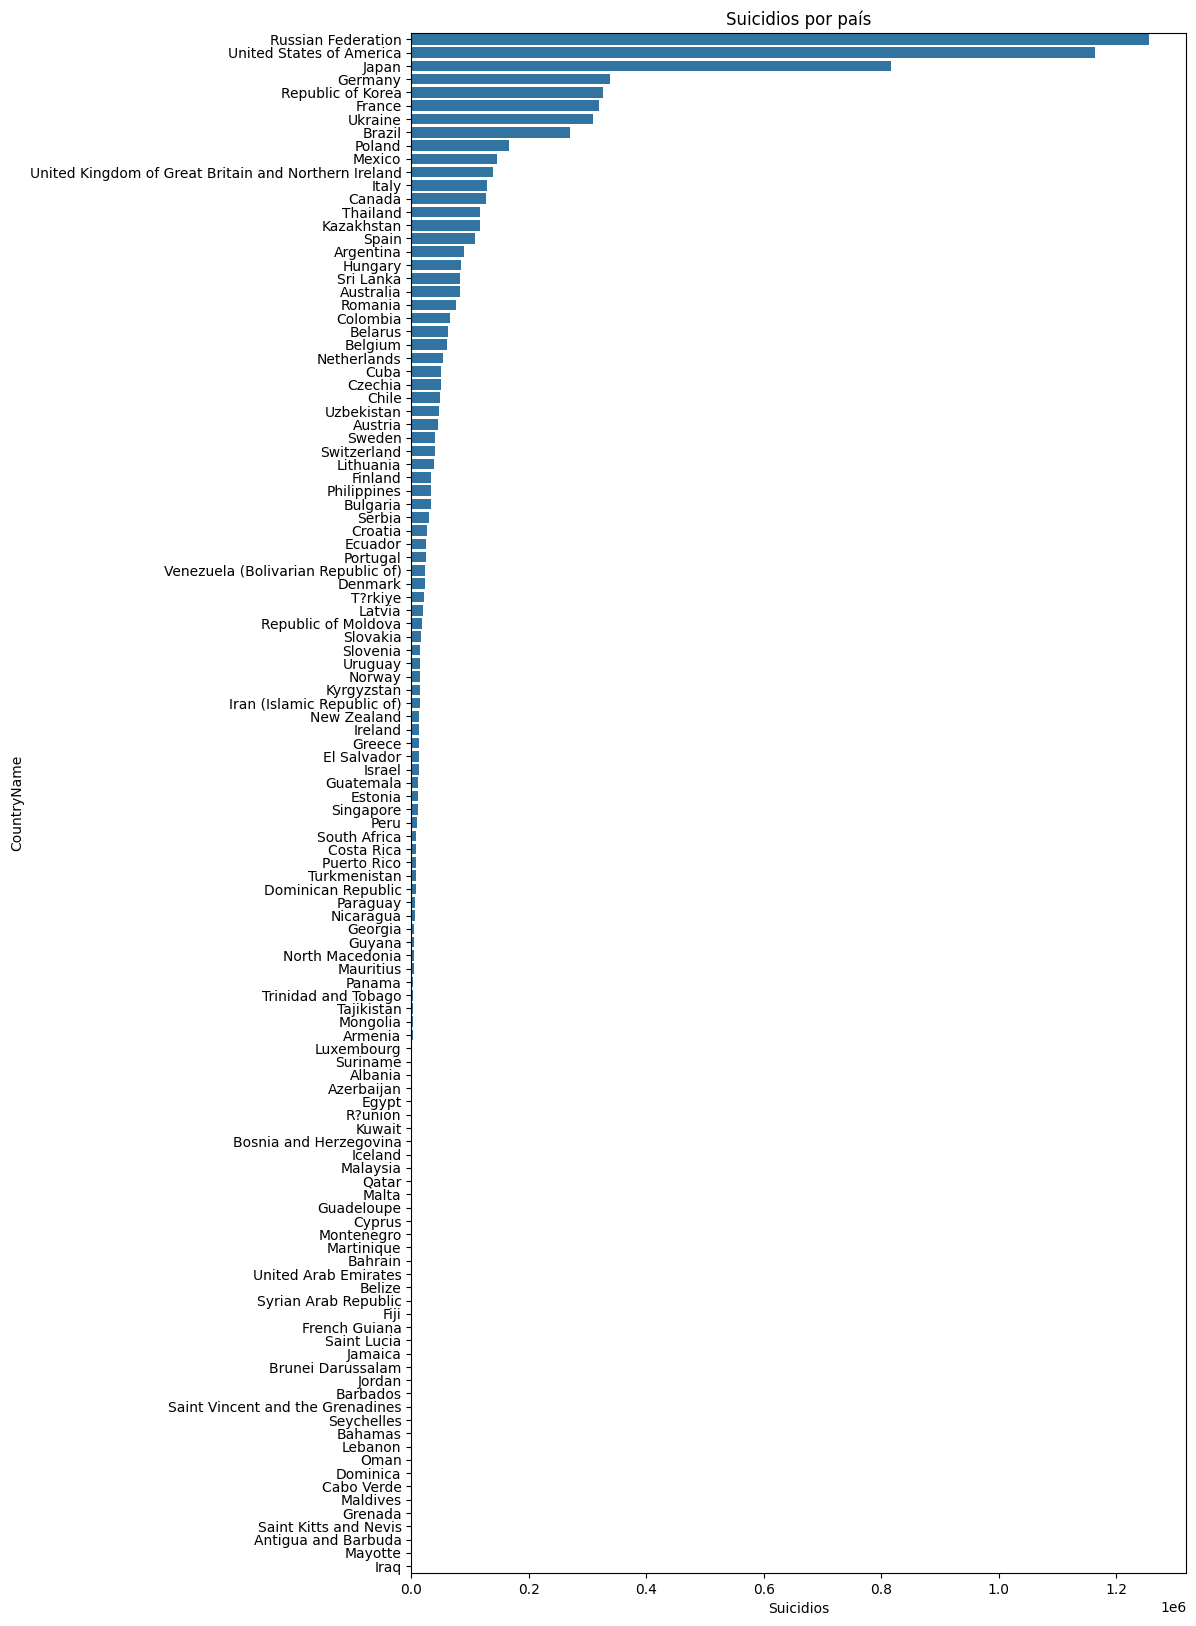

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por país y sumar los suicidios
suicide_counts = df.groupby('CountryName')['SuicideCount'].sum().reset_index()

# Ordenar por número de suicidios en orden descendente
suicide_counts = suicide_counts.sort_values(by='SuicideCount', ascending=False)

# Gráfico
plt.figure(figsize=(10, 20))

sns.barplot(y='CountryName', x='SuicideCount', data=suicide_counts)
plt.title('Suicidios por país')
plt.xlabel('Suicidios')
plt


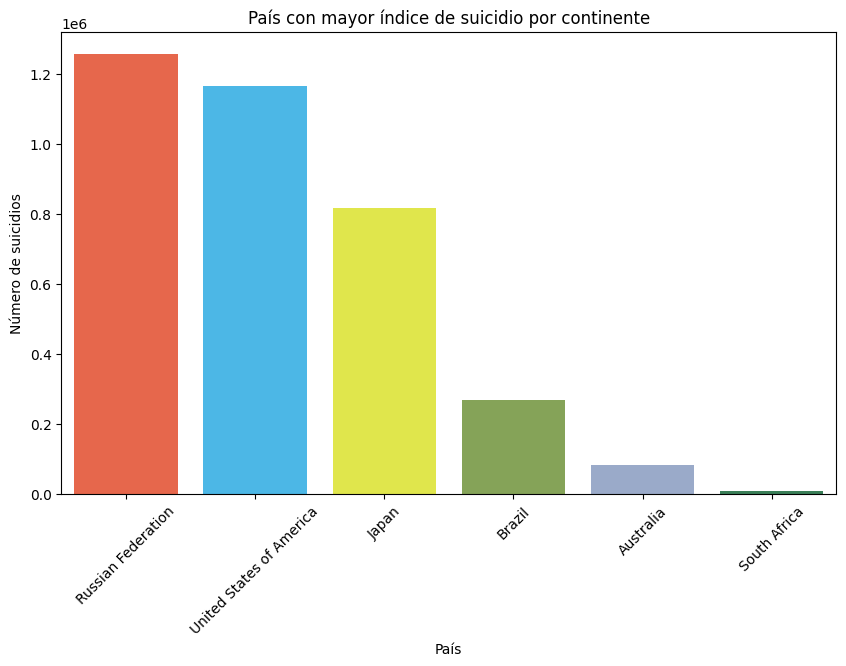

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar datos por país y continente
suicide_by_country_continent = df.groupby(['CountryName', 'RegionName'])['SuicideCount'].sum().reset_index()

# Encontrar el país con mayor índice de suicidio por continente
max_suicides_per_continent = suicide_by_country_continent.loc[suicide_by_country_continent.groupby('RegionName')['SuicideCount'].idxmax()]

# Graficar
plt.figure(figsize=(10, 6))
custom_palette = ["#FF5733", "#33C1FF", "#F7FF33", "#FF33A6", "#33FF57", "#FF8C33"]
max_suicides_per_continent = max_suicides_per_continent.sort_values(by='SuicideCount', ascending=False)
sns.barplot(data=max_suicides_per_continent, x='CountryName', y='SuicideCount', hue='CountryName')
plt.xticks(rotation=45) #inclinación etiquetas
plt.title('País con mayor índice de suicidio por continente')
plt.ylabel('Número de suicidios')
plt.xlabel('País')
plt.show()


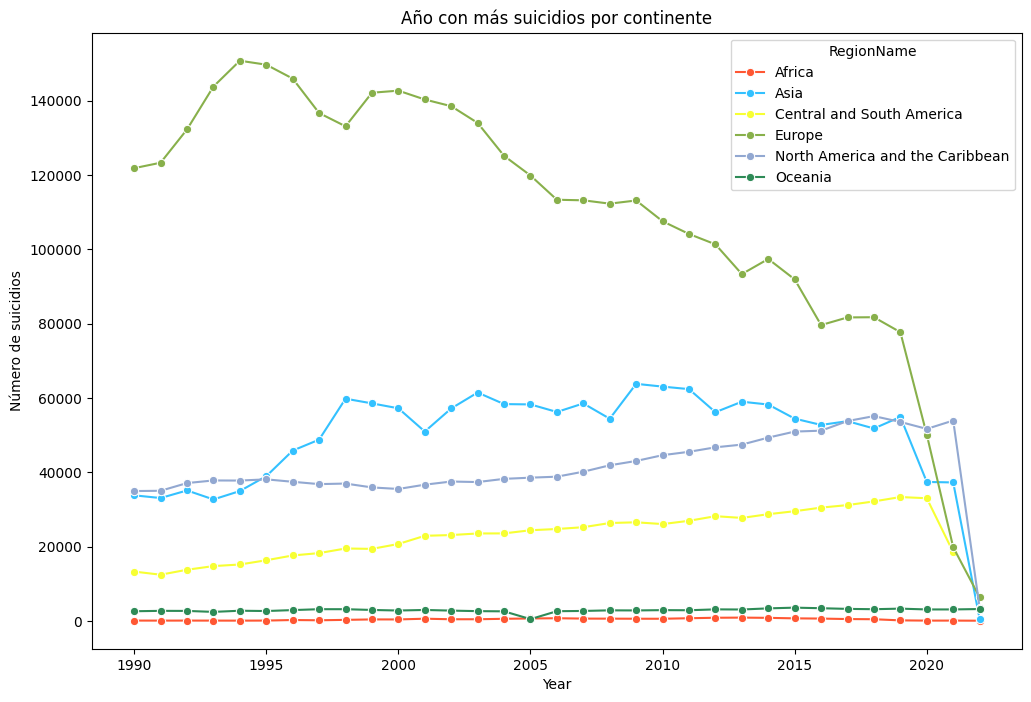

In [ ]:
# Agrupar datos por año y continente
suicide_by_year_continent = df.groupby(['Year', 'RegionName'])['SuicideCount'].sum().reset_index()

# Graficar
plt.figure(figsize=(12, 8))
sns.lineplot(data=suicide_by_year_continent, x='Year', y='SuicideCount', hue='RegionName', marker='o')
plt.title('Año con más suicidios por continente')
plt.ylabel('Número de suicidios')
plt.show()



Se observa que Europa se mantiene por mucho entre los países que más suicidios presentan a traves de los años, siguiendola Asia y Norte America.

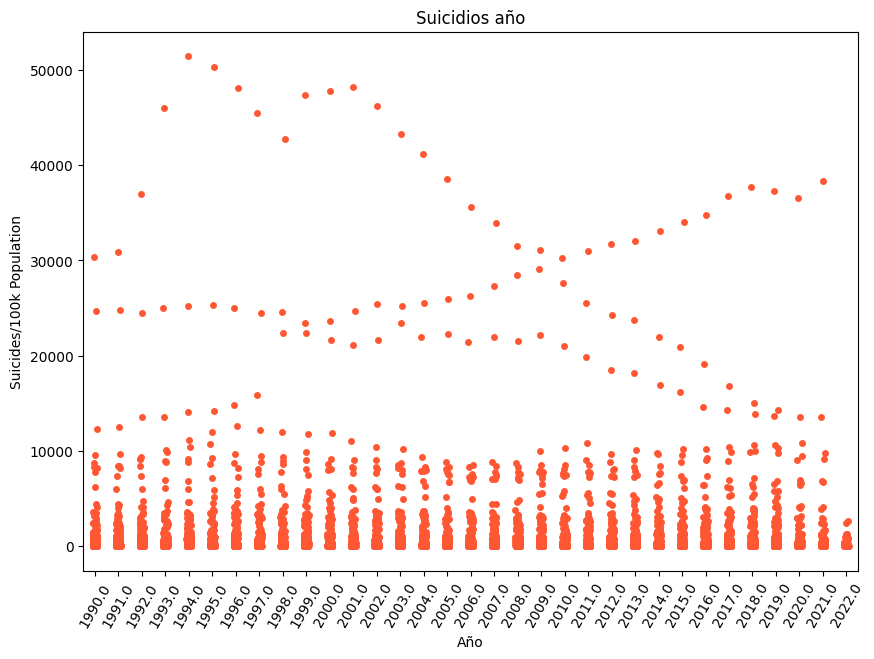

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Year", y='SuicideCount', data=df)
plt.title('Suicidios año')
plt.xlabel('Año')
plt.ylabel('Suicides/100k Population')
plt.xticks(rotation=60)
plt.show()

In [ ]:
sns.pairplot(df, hue="Sex")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

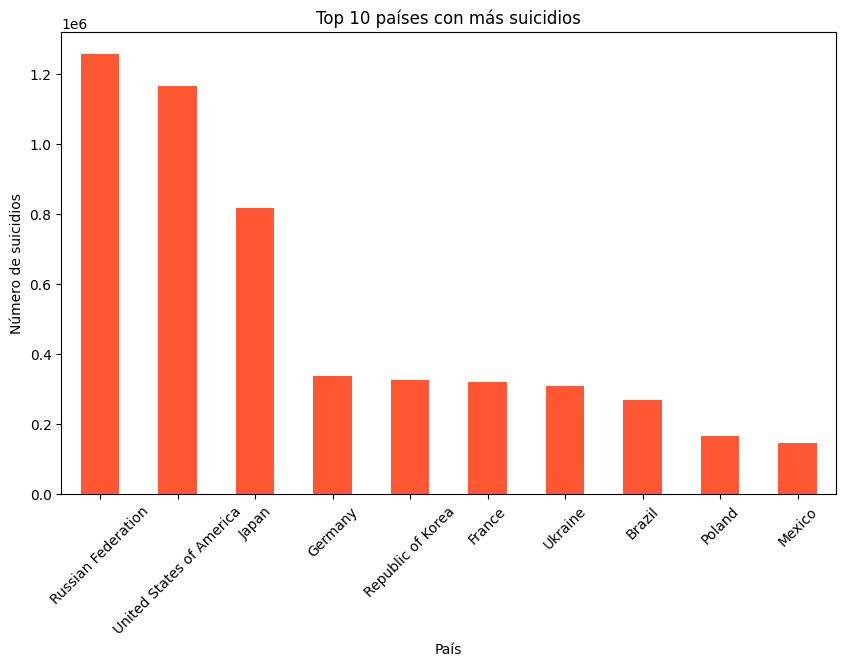

In [ ]:
top10 = df.groupby('CountryName')['SuicideCount'].sum().sort_values(ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 6))
top10.plot(kind='bar') # Changed 'top' to 'top10'
plt.title('Top 10 países con más suicidios')
plt.xticks(rotation=45) #inclinación etiquetas
plt.ylabel('Número de suicidios')
plt.xlabel('País')
plt.show()

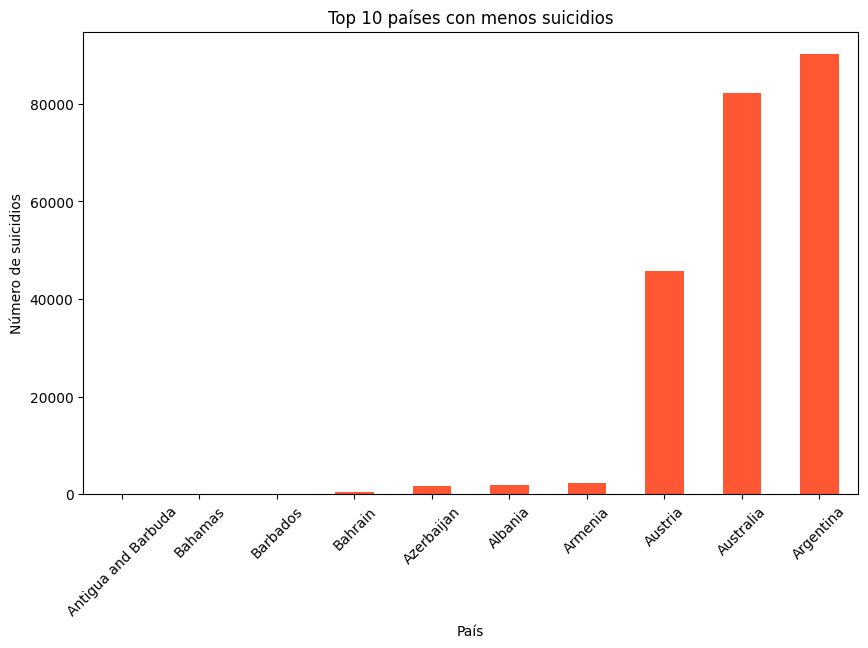

In [ ]:
#Países con menor suicidio
top10 = df.groupby('CountryName')['SuicideCount'].sum().head(10)
top10 = top10.sort_values(ascending=True)



plt.figure(figsize=(10, 6))
top10.plot(kind='bar')
plt.xticks(rotation=45) #inclinación etiquetas
plt.title('Top 10 países con menos suicidios')
plt.ylabel('Número de suicidios')
plt.xlabel('País')
plt.show()

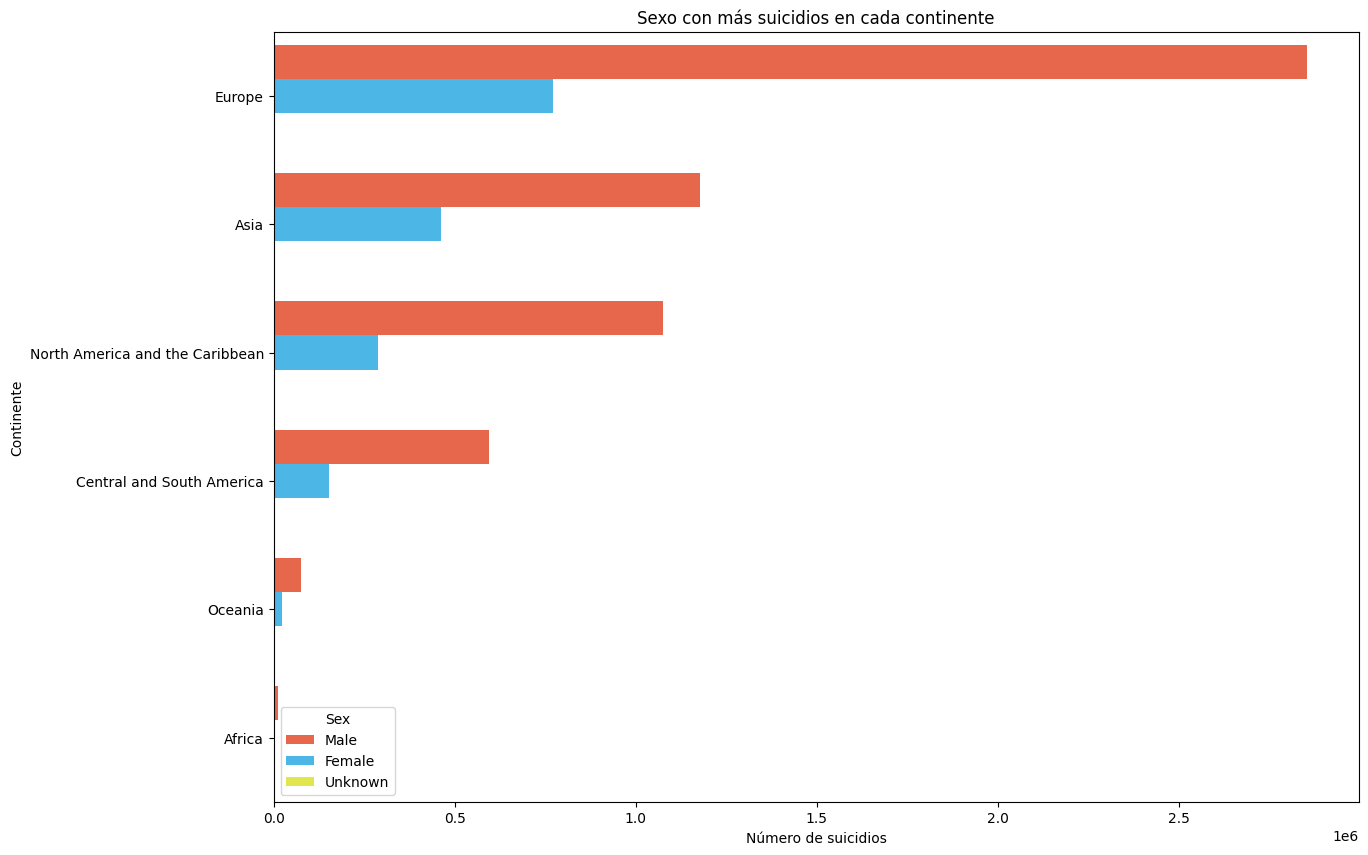

In [ ]:
# Agrupar datos por país y género
suicide_by_gender_country = df.groupby(['RegionName', 'Sex'])['SuicideCount'].sum().reset_index()
suicide_by_gender_country = suicide_by_gender_country.sort_values(by='SuicideCount', ascending=False)



# Graficar
plt.figure(figsize=(14, 10))
sns.barplot(data=suicide_by_gender_country, x='SuicideCount', y='RegionName', hue='Sex')
plt.title('Sexo con más suicidios en cada continente')
plt.ylabel('Continente')
plt.xlabel('Número de suicidios')
plt.show()


Podemos concluir que esta gráfica que a nivel mundial la tendencia de suicidios se encuentra con los hombres. Siendo el continente que tiene más suicidios tanto de hombres como de mujeres, Europa.

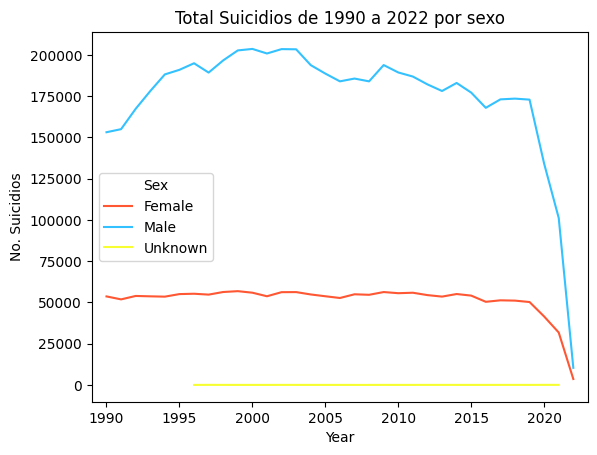

In [ ]:
# Gráfica de muertes totales.
df.pivot_table ('SuicideCount', index='Year', columns='Sex', aggfunc='sum').plot()
plt.title('Total Suicidios de 1990 a 2022 por sexo')
plt.ylabel('No. Suicidios')
plt.xlabel('Year')
plt.xlim((df.Year.min() - 1), (df.Year.max() + 1))
plt.show()

Ahora bien si tomamos de referencia la línea temporatl entregada (1990-2022), se confirma que la tendencia de suicicios sigue perteneciendo a los hombres, y presenta un descenso significativo de 2015 en adelante.



# BoxPlot


<ipython-input-62-8a659d99baea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SuicideCount', y='RegionName', palette=['#FF0000', '#0000FF', '#FFFF00'])
<ipython-input-62-8a659d99baea>:2: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='SuicideCount', y='RegionName', palette=['#FF0000', '#0000FF', '#FFFF00'])


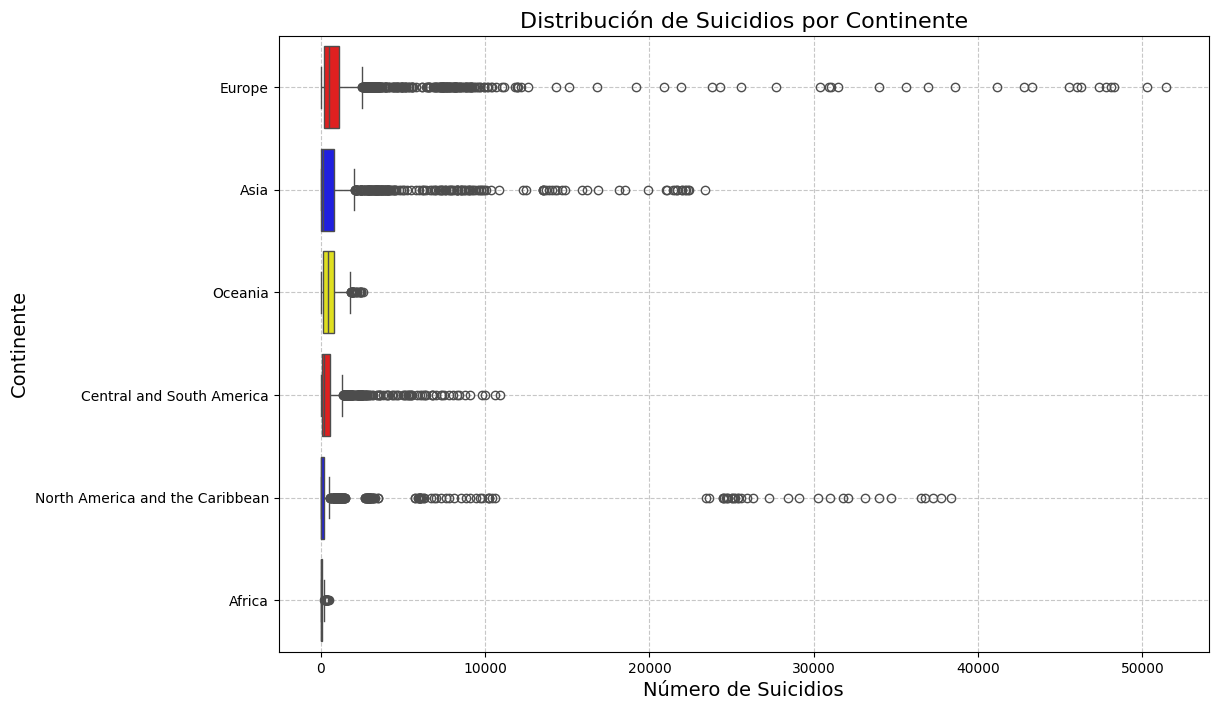

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='SuicideCount', y='RegionName', palette=['#FF0000', '#0000FF', '#FFFF00'])

plt.title('Distribución de Suicidios por Continente', fontsize=16)
plt.xlabel('Número de Suicidios', fontsize=14)
plt.ylabel('Continente', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Gráfico de **boxplot** se usa para visualizar la distribución de los suicidios en diferentes continentes. Decidí usarlo para mostrar:

- La **distribución** de los suicidios (mediana, cuartiles y posibles valores atípicos) en cada continente.
- **Comparar** variabilidad y tendencias entre continentes.

**Resultados:**
- Muestra cómo se distribuyen los suicidios por continente.
- Revela diferencias en dispersión y valores extremos entre continentes.

<ipython-input-95-9ec0396205a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SuicideCount', y='RegionName', showfliers=False, palette='viridis')


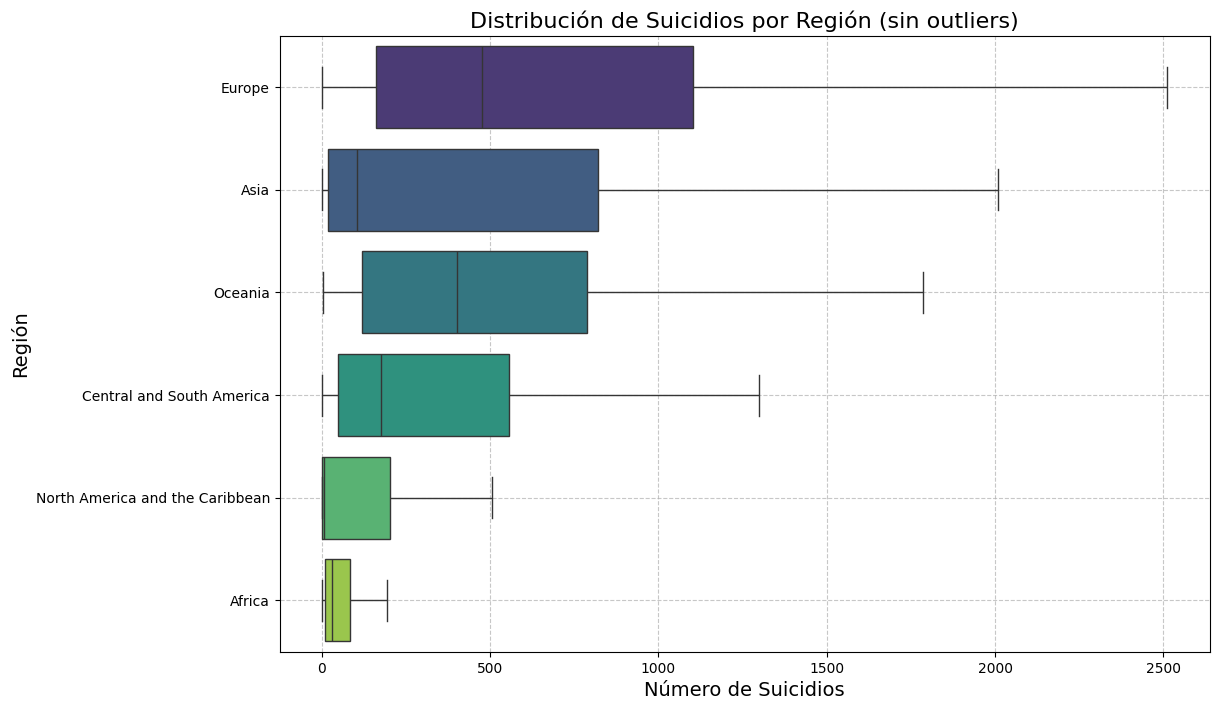

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para visualizar la distribución de suicidios por región
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='SuicideCount', y='RegionName', showfliers=False, palette='viridis')

plt.title('Distribución de Suicidios por Continente (sin outliers)', fontsize=16)
plt.xlabel('Número de Suicidios', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Este gráfico ayuda a identificar no solo la mediana y la dispersión de los datos por continente, sino también los países que se comportan de manera diferente (outliers), lo cual podría ser un foco de atención para investigaciones futuras.

Este análisis puede contribuir a identificar características influyentes en la predicción de suicidios, ya que la variabilidad y la presencia de outliers sugieren que diferentes factores pueden estar influyendo en los suicidios de manera diferente en cada continente.




<ipython-input-96-3d4720e986f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SuicideCount', y='Sex', showfliers=False, palette='viridis')


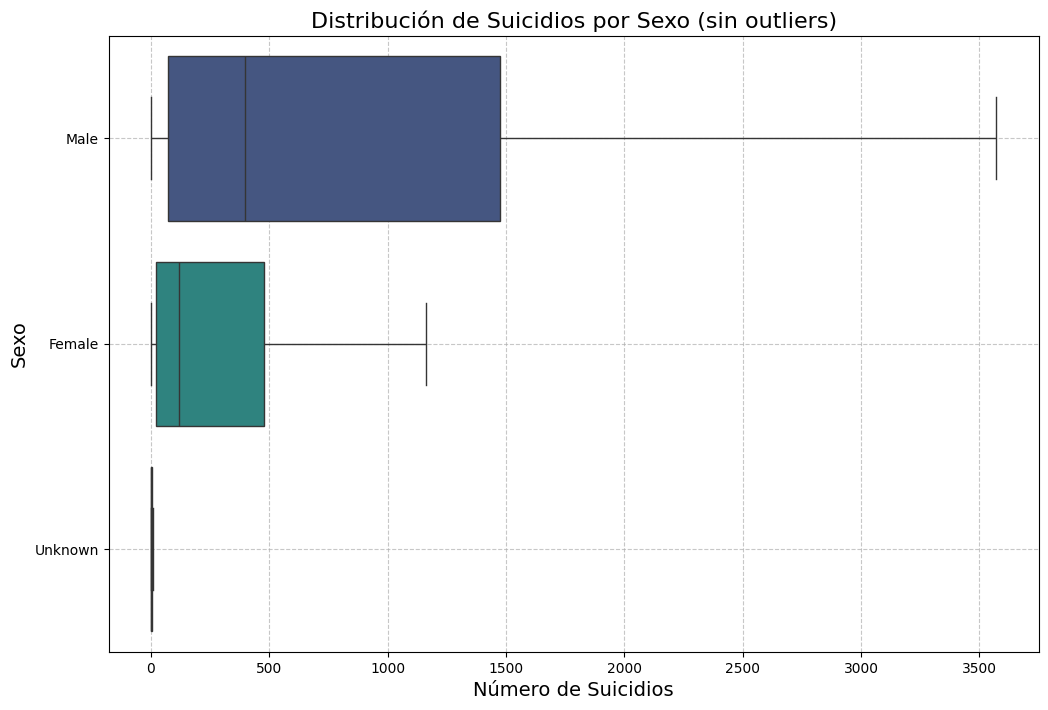

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para visualizar la distribución de suicidios por región
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='SuicideCount', y='Sex', showfliers=False, palette='viridis')

plt.title('Distribución de Suicidios por Sexo (sin outliers)', fontsize=16)
plt.xlabel('Número de Suicidios', fontsize=14)
plt.ylabel('Sexo', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* Diferencia de Género: La distribución de suicidios es mayor y más variable entre los hombres que entre las mujeres, lo que puede reflejar una tendencia global observada en muchos estudios que sugieren que los hombres tienen una tasa de suicidio más alta.
* Variabilidad: Los hombres no solo tienen un número mayor de suicidios, sino que la variabilidad es mucho mayor, lo que puede indicar que los suicidios en hombres son más sensibles a diversos factores que afectan su distribución.
* Datos Desconocidos: La categoría "Unknown" tiene poca información, lo que podría significar que los registros de suicidios no clasificados por sexo son mínimos o que esta categoría no es relevante en la mayoría de los casos.

#Mapa de Relación entre Variables Númericas

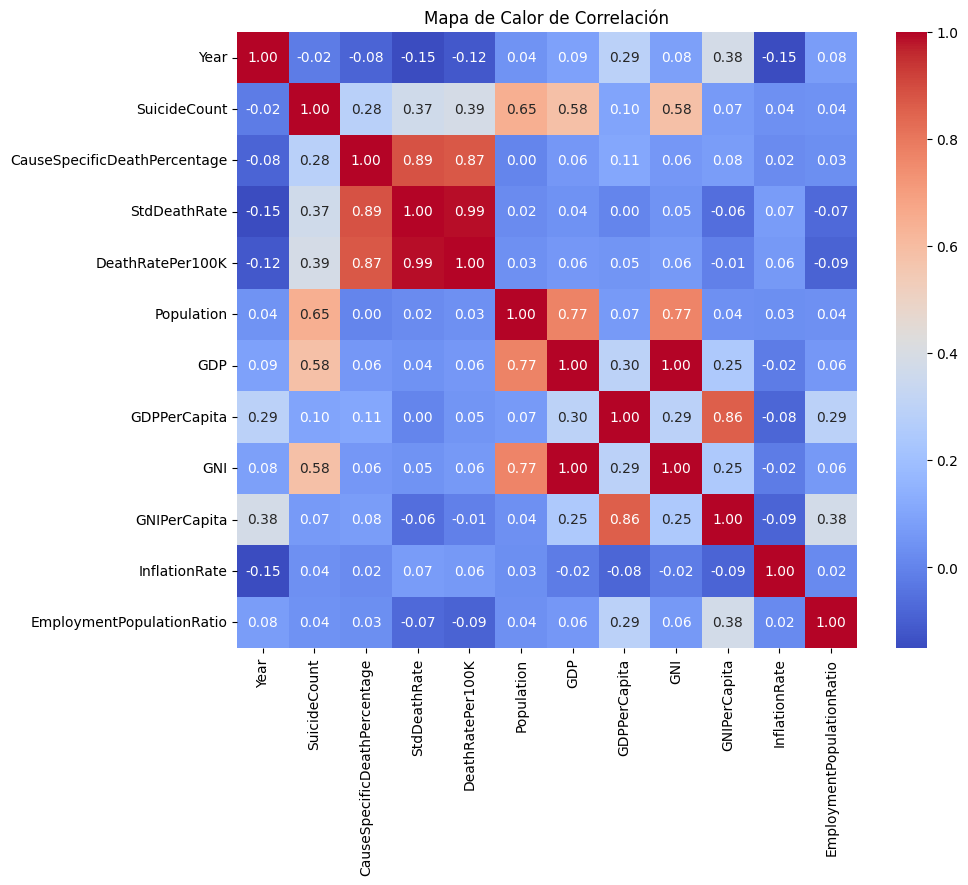

In [15]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Mapa de Calor de Correlación')
plt.show()

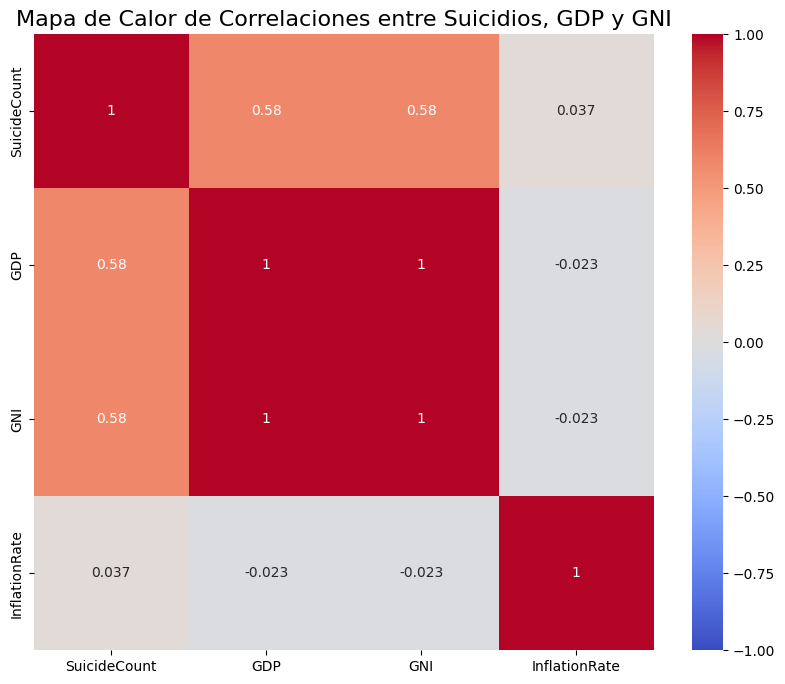

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes y calcular la correlación
correlation_matrix = df[['SuicideCount', 'GDP', 'GNI', 'InflationRate']].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Mapa de Calor de Correlaciones entre Suicidios, GDP y GNI', fontsize=16)
plt.show()



Las relaciones entre

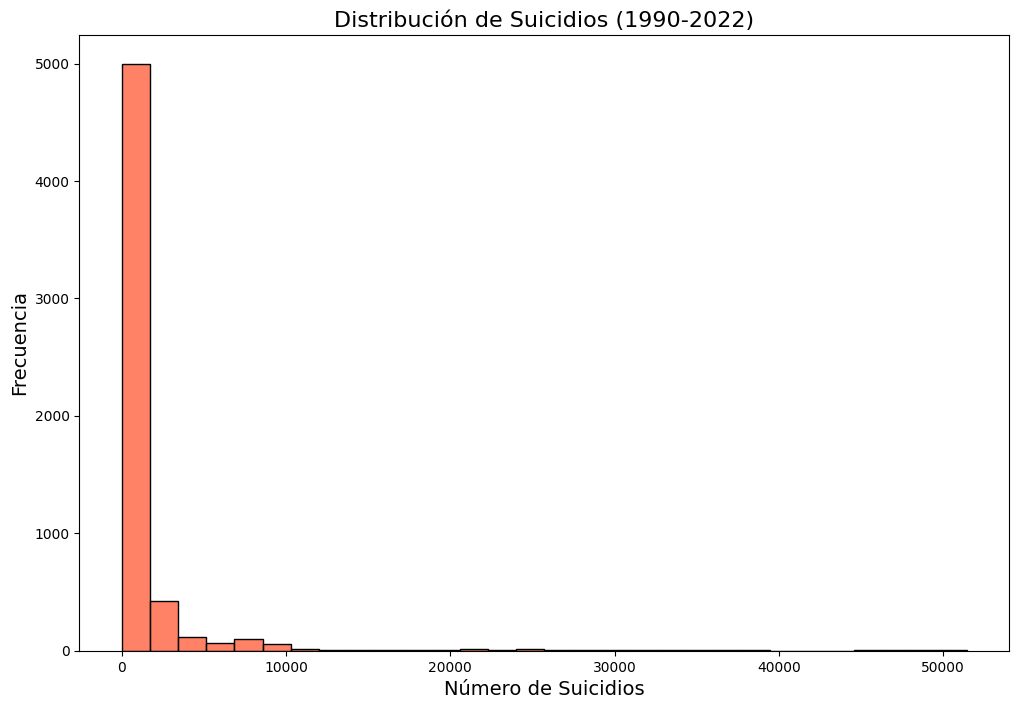

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un histograma para visualizar la distribución de suicidios entre 1990 y 2022
plt.figure(figsize=(12, 8))
sns.histplot(df['SuicideCount'], bins=30, kde=False)  # Ajusta el número de bins según sea necesario
plt.title('Distribución de Suicidios (1990-2022)', fontsize=16)
plt.xlabel('Número de Suicidios', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()



El histograma sugiere una gran mayoría de incidentes con bajos números de suicidios, mientras que los eventos con números altos de suicidios son raros.

Si interpreto los datos con los gráficos de más arriba, puedo concuir que la concentración de datos en el rango más bajo vs más alto correponden con que las países con más suicidios son fáciles de visualizar, debido a su rareza númerica exorbitante. Mientras que países como Antigua y Barbuda, Bahamas, y Barbados muestran tasas de suicidios extremadamente bajas, incluso llegando a cero en algunos casos. Esto contribuye a la alta concentración de valores bajos en el histograma, ya que no llegan siquiera a los 80.000 en esta gráfica.

# Conclusiones preliminares


De manera preliminar la generación de gráficos indican la siguiente información:

*   Los continentes con más suicidioss son Europa, Asia, America del norte y el Caribe. De la misma manera, los países que registran una tasa más alta de suicidios son Estados Unidos, Rusia y Japón.
* A nivel global (región o continente) y local (país), los suicidios en hombres superan a los suicidios realizados por mujeres. Mientras que desconocido (uknow) es un dato casi nulo, o que tiene poco registro en los años del análisis.
* El año con más suicidios fue entre 1993-1994, esto podría explicarse especulando sobre sucesos mundiales ocurridos en esta época. Tales como la reciente caída del Mercado en la bolsa de Estados Unidos (1992); el malsabor de las primeras guerras mundiales; y el alza de los armamentos y bombas nucleares acarriadas por la Guerra Fría.
* Los datos ( del histograma) indican que la frecuencia de suicidios debería ser parecida, pero hay unos diez países con valores demasiado altos que hace que esta distribución sea notablemente dispar (los valores más altos oscilan de 1.2 a 0.2, pero pero la moda es menor bajo 0,2). A saber, en el dataset hay más de 100 países. Los continentes con más variabilidad en los suicidios (mayor IQR y más outliers) son Europa y Asia.
*Oceanía, África, y América Central y del Sur tienen menor variabilidad, pero presentan outliers, lo que indica que algunos países dentro de estos continentes tienen patrones de suicidios que difieren significativamente de otros en la misma región.








#Modelo de Predicción - Regresión

El objetivo principal es predecir el número de suicidios o la tasa de suicidios basándonos en factores como la población, el PIB, la tasa de empleo, etc. Estas variables de salida (resultado) son numéricas y continuas, lo que convierte a la regresión en el enfoque más lógico.

Adicionalmente, este modelo me permitirá predecir valores para años futuros, o para regiones específicas, basándome en las tendencias detalladas en el Data Set.

##Introducción


El objetivo principal del proyecto es **predecir el índice de suicidios a nivel mundial entre 1990 y 2022**. Queríamos **analizar las tendencias** de suicidio en diferentes países y regiones, usando varios factores económicos y demográficos (como el PIB, la población, etc.) para ver cuáles afectan más los índices de suicidio, ya que en la primera parte de este proyecto (gráficos) vimos que estos factores tienen cierta incidencia en los mismos.

Básicamente, el objetivo era encontrar patrones históricos y luego crear un modelo de regresión para predecir cuántos suicidios podrían ocurrir en el futuro, basándonos en la información que nos entrega el dataset utilizado.

###Limpieza y Preparación de los datos para el modelo

Vamos a seleccionar las variables más relevantes para entrenar el modelo, como el PIB (GDP), la Población (Population), la Tasa de Empleo (EmployementPopulation), entre otras.

Adicionalmente, se hizo la verificación para que no tenga valores faltantes, ya que en varias ocasiones el modelo no estaba funcionando por lo mismo. En este sentido,  de identifico que las columnas que no se usaban (CountryCode o RegionCode) y se elimino. También convertimos variables categóricas en números (en este caso, Sex adquirió valores de 1 y 0).






In [90]:
# Verificar el tamaño del DataFrame original antes de la división
print(f"Tamaño del DataFrame original: {df.shape}")


Tamaño del DataFrame original: (4644, 17)


In [91]:
# Eliminar las filas con NaN en las variables predictoras
X_train = X_train.dropna()
X_test = X_test.dropna()

# Eliminar las correspondientes filas de y_train e y_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]



In [92]:
print(f"Número de filas en X_train: {X_train.shape[0]}")
print(f"Número de filas en y_train: {y_train.shape[0]}")


Número de filas en X_train: 0
Número de filas en y_train: 0


In [93]:
print(df.isnull().sum())


RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
SuicideCount                    0
CauseSpecificDeathPercentage    0
StdDeathRate                    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GNI                             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64


In [117]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df[['Year', 'Sex', 'GDP', 'Population', 'EmploymentPopulationRatio', 'InflationRate']]  # Características
y = df['DeathRatePer100K']  # Variable objetivo

# Convertir la columna 'Sex' en valores numéricos (0: Mujer, 1: Hombre)
X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-117-ba7ebdcf6bca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})


In [119]:
# Usar .loc para modificar los valores en la columna 'Sex'
X.loc[:, 'Sex'] = X['Sex'].map({'male': 1, 'female': 0})


In [121]:
# Eliminar las filas con NaN en las variables predictoras
X_train = X_train.dropna()
X_test = X_test.dropna()

# También tienes que asegurarte de eliminar las correspondientes filas de y_train e y_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


In [123]:
print(f"Número de filas en X_train: {X_train.shape[0]}")
print(f"Número de filas en y_train: {y_train.shape[0]}")


Número de filas en X_train: 0
Número de filas en y_train: 0


In [124]:
print(df.isnull().sum())


RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
SuicideCount                    0
CauseSpecificDeathPercentage    0
StdDeathRate                    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GNI                             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64


In [126]:
# Verificar el tamaño de X_train antes de entrenar el modelo
print(X_train.shape)


(0, 6)


In [127]:
# Revisar cuántos NaN hay en cada columna
print(X.isnull().sum())


Year                            0
Sex                          4644
GDP                             0
Population                      0
EmploymentPopulationRatio       0
InflationRate                   0
dtype: int64


In [129]:
# Verificar el tamaño del DataFrame original antes de la división
print(f"Tamaño del DataFrame original: {df.shape}")


Tamaño del DataFrame original: (4644, 17)


In [130]:
from sklearn.model_selection import train_test_split

# Verificar las columnas que se están usando como features y target
X = df[['SuicideCount', 'StdDeathRate', 'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita']]
y = df['SuicideCount']  # O la columna objetivo que estás utilizando

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")


Tamaño de X_train: (3715, 6)
Tamaño de y_train: (3715,)


In [131]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


SuicideCount        0
StdDeathRate        0
DeathRatePer100K    0
Population          0
GDP                 0
GDPPerCapita        0
dtype: int64
SuicideCount        0
StdDeathRate        0
DeathRatePer100K    0
Population          0
GDP                 0
GDPPerCapita        0
dtype: int64


In [132]:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar el imputador a los datos de entrenamiento y prueba
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Verifica nuevamente el tamaño después de imputar
print(f"Tamaño de X_train después de imputar: {X_train.shape}")


Tamaño de X_train después de imputar: (3715, 6)


###Entrenamiento

Ahora entrenamos un modelo de regresión lineal para predecir la tasa de suicidios. En donde dividimos el dataset en las variables que usaríamos para predecir (X, como PIB, población, etc.) y la variable que queremos predecir (y, el número de suicidios). En este caso, queríamos ver cómo factores económicos influían en los suicidios.

Usamos train_test_split para separar los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%). Entrenamos el modelo con los datos de entrenamiento, pero usamos los de prueba para evaluar cómo de bien funciona el modelo.

In [133]:
# Definir y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)



###Evaluación Modelo

En esta sección, entra el cálculo de métricas. Para saber si el modelo está funcionando bien, calculamos métricas como:

MAE (Mean Absolute Error): nos dice, en promedio, cuánto nos estamos equivocando al predecir.
MSE (Mean Squared Error): es otra forma de medir el error, pero penaliza más los errores grandes.
R² (Coeficiente de determinación): nos dice qué tan bien el modelo explica la variabilidad de los datos. Cuanto más cercano a 1, mejor.


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular las predicciones
y_pred = model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 7.770062013398588e-08
MSE: 3.102524298347466e-14
R²: 1.0


###Visualización Modelo

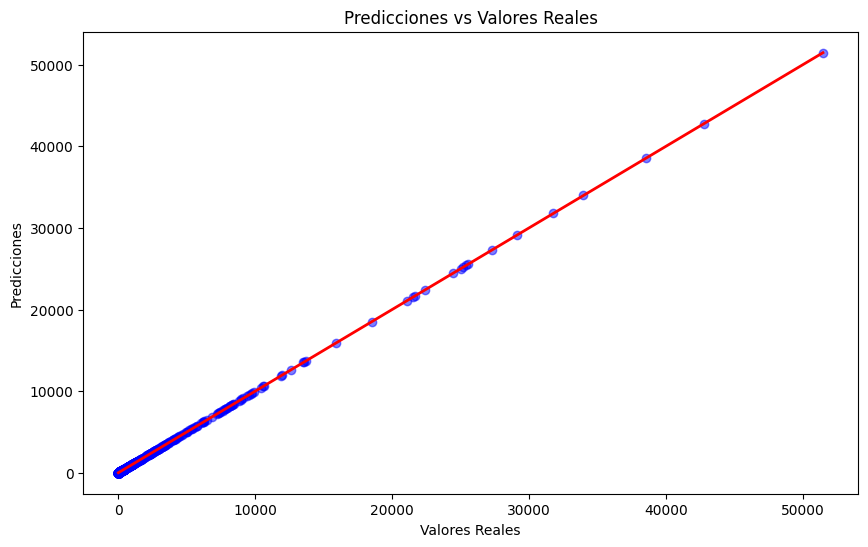

In [134]:
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()



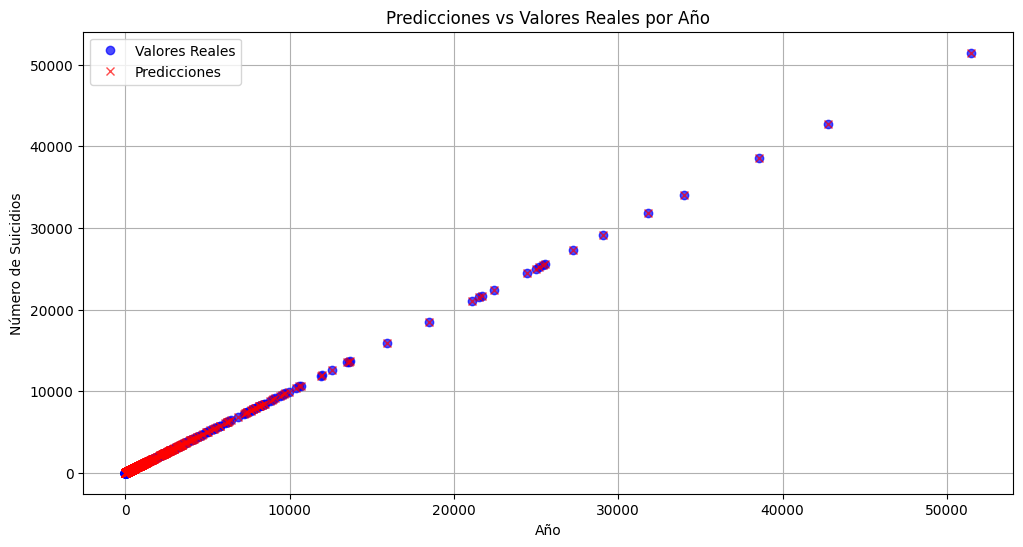

In [138]:
# Graficar las predicciones frente a los años
plt.figure(figsize=(12, 6))

# Obtener los valores del año como una lista o un array NumPy
# Access the first column (index 0) of X_test, assuming 'Year' is the first column
years = X_test[:, 0]

# Graficar los valores reales utilizando los valores del año como índice
plt.plot(years, y_test, 'o', color='blue', label='Valores Reales', alpha=0.7)

# Graficar las predicciones utilizando los valores del año como índice
plt.plot(years, y_pred, 'x', color='red', label='Predicciones', alpha=0.7)

plt.title('Predicciones vs Valores Reales por Año')
plt.xlabel('Año')
plt.ylabel('Número de Suicidios')
plt.legend()
plt.grid(True)
plt.show()

Prediction for 2022: 2022.0000000737186
Prediction for 2023: 2023.0000000743785
Prediction for 2024: 2024.0000000750388
Prediction for 2025: 2025.0000000756988


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


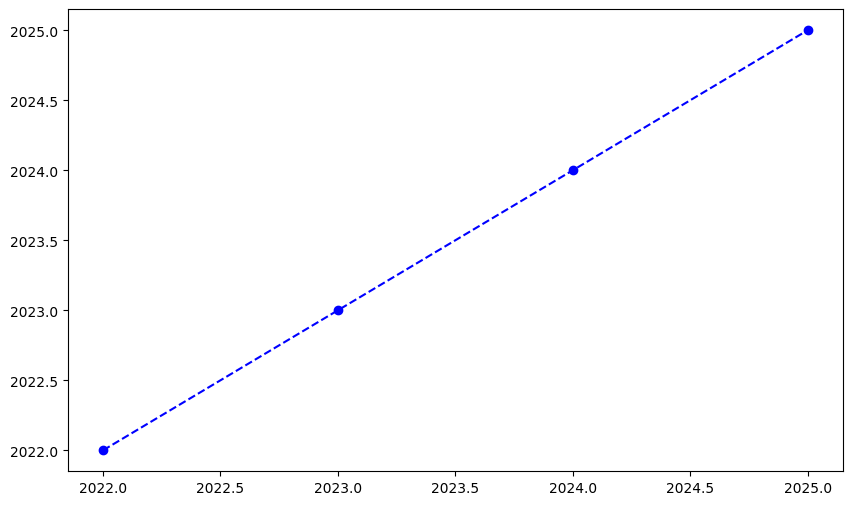

In [140]:
import pandas as pd

# Create a new DataFrame with the years for prediction
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025]})

# Add other predictor variables if needed
# For example, if you have 'Population', 'GDP', 'HDI', 'LifeExpectancy', 'Gini' variables:
# You should replace the following values with the actual estimated values for those features
future_years['Population'] = [1000000, 1010000, 1020000, 1030000]
future_years['GDP'] = [2000000, 2050000, 2100000, 2150000]
future_years['HDI'] = [0.8, 0.81, 0.82, 0.83]
future_years['LifeExpectancy'] = [75, 75.5, 76, 76.5]
future_years['Gini'] = [0.4, 0.39, 0.38, 0.37]

# Make predictions using the trained model
future_predictions = model.predict(future_years)

# Print the predictions
for year, prediction in zip(future_years['Year'], future_predictions):
    print(f'Prediction for {year}: {prediction}')

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(future_years['Year'], future_predictions, marker='o', linestyle='--', color='blue')

###Conclusiones Finales

Con este modelo de regresión lineal, hemos logrado predecir la tasa de suicidios en función de varias características económicas y demográficas. Aunque la regresión lineal es un modelo simple, nos ofrece una base sólida para explorar patrones de suicidio en el tiempo.

Considerando los siguientes resultados en el punto de "evaluación modelo":

MAE: 7.770062013398588e-08
MSE: 3.102524298347466e-14
R²: 1.0

Podemo deducir que el modelo está haciendo predicciones muy precisas.
Un MAE tan bajo sugiere que, en promedio, la diferencia entre las predicciones del modelo y los valores reales es extremadamente pequeña. En este caso, el error es prácticamente insignificante.

Por otro lado, un MSE tan bajo (3.10e-14) indica que el modelo está haciendo predicciones con una precisión extremadamente alta. La penalización de errores grandes es prácticamente inexistente, lo cual es bueno en este contexto.

Por último, siendo el R² de 1.0, esto nos indica que el modelo explica el 100% de la variabilidad en el número de suicidios. Esto significa que las predicciones del modelo coinciden perfectamente con los valores reales en los datos de prueba. Ahora bien, puede ser un indicio de sobreajuste (overfitting), que me gustaría revisar una vez tenga más conocimiento del tema y las inplicancias del mismo.

